In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data_set=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Ivy Assignment\JMart Retailer eCommerce Portal Visit Data.xlsx',sheet_name='Visit Data')
OS_Type_LookUp=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Ivy Assignment\JMart Retailer eCommerce Portal Visit Data.xlsx',sheet_name='OS_Type_LookUp')
Browser_Type_LookUp=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Ivy Assignment\JMart Retailer eCommerce Portal Visit Data.xlsx',sheet_name='Browser_Type_LookUp')
City_Code_LookUp=pd.read_excel(r'C:\Users\IN22912959\OneDrive - Tesco\Documents\Ivy Assignment\JMart Retailer eCommerce Portal Visit Data.xlsx',sheet_name='City_Code_LookUp')

In [322]:
#Take a copy of the data , so that you need not read the excel sheets again and again.
data=data_set.copy()
os_data=OS_Type_LookUp.copy()
browser=Browser_Type_LookUp.copy()
city_code=City_Code_LookUp.copy()

##### Data Understanding

In [323]:
data.describe()

,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,OS_Type,Browser_Type,City_Code,Type_Traffic
count,12330.000000,12320.000000,12313.000000,12330.000000,12315.000000,12330.000000,12330.000000,12330.000000,12330.000000,12319.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,15165.500000,31.595942,1195.710101,0.503569,34.127646,2.315166,82.449083,0.022577,0.043392,5.885357,0.061427,2.124006,2.357097,3.147364,4.069586
std,3559.508744,44.077910,1914.737266,1.270156,139.419912,3.321784,204.892662,0.051445,0.051077,18.565998,0.198917,0.911325,1.717277,2.401591,4.025169
min,9001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,12083.250000,7.000000,184.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,15165.500000,18.000000,599.100000,0.000000,0.000000,1.000000,7.500000,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,18247.750000,38.000000,1466.088462,0.000000,0.000000,4.000000,93.256250,0.016923,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,21330.000000,705.000000,63973.522230,24.000000,2549.375000,27.000000,6021.000000,0.889000,0.855600,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [324]:
os_data

,OS_Type,OS_Type_Name
0,1,MicrosoftWindows
1,2,Linux
2,3,MacOS
3,4,Ubuntu
4,5,Fedora
5,6,FreeBSD
6,7,Chrome OS
7,8,Debian


In [325]:
browser

,Browser_Type,Browser_Type_Name
0,1,Chrome
1,2,Mozilla Firefox
2,3,Microsoft Edge
3,4,Opera
4,5,Avast Secure Browser
5,6,UC Browser
6,7,Yandex Browser
7,8,Chromium
8,9,Maxthon
9,10,Vivaldi


In [326]:
city_code

,City_Code,City_Code_Name
0,1,Mumbai
1,2,Bangalore
2,3,New Delhi
3,4,Gurgaon
4,5,Kolkata
5,6,Chennai
6,7,Pune
7,8,Hyderabad
8,9,Vizag


In [327]:
#length of dataframe to have a check at last to see even if you have filled missing values you have same number of rows or not.
len(data)

12330

##### Data Cleaning

In [328]:
#finding missing values
data.isnull().sum()

Visitor ID                0
Product_Webpage          10
Product_Webpage_time     17
Blog_WebPage              0
Blog_WebPage_Time        15
Profile_Login_WebPage     0
Profile_Login_time        0
Rate_Bnc                  0
Rate_Ext                  0
Vals_Page                11
Occasion                  0
Month                     0
OS_Type                   0
Browser_Type              0
City_Code                 0
Type_Traffic              0
Nature_Visitor            0
Week_end                  0
Purchase_Decision         0
dtype: int64

In [329]:
#finding the average product webpage,Product_Webpage_time,Blog_WebPage_Time,Vals_Page by Nature visitor , weekend , ourchase desicion to fill in the  missing values

average_product_webpage=data.groupby(['Nature_Visitor','Week_end','Purchase_Decision'])['Product_Webpage','Product_Webpage_time','Blog_WebPage_Time','Vals_Page'].mean().reset_index()
average_product_webpage

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Nature_Visitor,Week_end,Purchase_Decision,Product_Webpage,Product_Webpage_time,Blog_WebPage_Time,Vals_Page
0,New_Visitor,False,False,16.516704,549.370124,18.304876,1.316235
1,New_Visitor,False,True,22.586751,895.535285,22.108228,40.012034
2,New_Visitor,True,False,16.970588,579.537023,20.768722,1.494996
3,New_Visitor,True,True,21.390476,811.036340,12.887302,36.757038
4,Other,False,False,9.857143,411.786587,4.297884,1.106559
5,Other,False,True,25.800000,1338.951665,0.714286,96.346798
6,Other,True,False,7.833333,401.263889,50.333333,5.231477
7,Other,True,True,5.000000,50.000000,0.000000,0.000000
8,Returning_Visitor,False,False,29.698659,1127.682198,29.544319,2.099714
9,Returning_Visitor,False,True,56.935814,2248.250608,66.802993,22.518963


In [330]:
#Filling Product_Webpage missing values
a=data[data['Product_Webpage'].isnull()]
a=a.merge(average_product_webpage[['Nature_Visitor','Week_end','Purchase_Decision','Product_Webpage']],left_on=['Nature_Visitor','Week_end','Purchase_Decision'],right_on=['Nature_Visitor','Week_end','Purchase_Decision'],how='inner')
a.head(2)
a['Product_Webpage_x']=a['Product_Webpage_y']
a.head(2)

a=a.drop(['Product_Webpage_y'],axis=1)
a=a.rename(columns={"Product_Webpage_x": "Product_Webpage"})
a.head(2)
a.head(2)
data=pd.concat([data,a])
data.isnull().sum()
data = data[data['Product_Webpage'].notna()]
data.head()

,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
0,14298,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,16685,2.0,64.000000,0,0.0,0,0.0,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,14425,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,17400,2.0,2.666667,0,0.0,0,0.0,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,16108,10.0,627.500000,0,0.0,0,0.0,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [331]:
#Filling Product_Webpage_time missing values
b=data[data['Product_Webpage_time'].isnull()]
b=b.merge(average_product_webpage[['Nature_Visitor','Week_end','Purchase_Decision','Product_Webpage_time']],left_on=['Nature_Visitor','Week_end','Purchase_Decision'],right_on=['Nature_Visitor','Week_end','Purchase_Decision'],how='inner')
b['Product_Webpage_time_x']=b['Product_Webpage_time_y']
b.head(2)

b=b.drop(['Product_Webpage_time_y'],axis=1)
b=b.rename(columns={"Product_Webpage_time_x": "Product_Webpage_time"})

data=pd.concat([data,b])
data.isnull().sum()
data = data[data['Product_Webpage_time'].notna()]
data.head()


,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
0,14298,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,16685,2.0,64.000000,0,0.0,0,0.0,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,14425,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,17400,2.0,2.666667,0,0.0,0,0.0,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,16108,10.0,627.500000,0,0.0,0,0.0,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [332]:

len(data)

12330

In [333]:
#Fillling Blog_WebPage_Time missing values
c=data[data['Blog_WebPage_Time'].isnull()]
c=c.merge(average_product_webpage[['Nature_Visitor','Week_end','Purchase_Decision','Blog_WebPage_Time']],left_on=['Nature_Visitor','Week_end','Purchase_Decision'],right_on=['Nature_Visitor','Week_end','Purchase_Decision'],how='inner')
c['Blog_WebPage_Time_x']=c['Blog_WebPage_Time_y']
c.head(2)

c=c.drop(['Blog_WebPage_Time_y'],axis=1)
c=c.rename(columns={"Blog_WebPage_Time_x": "Blog_WebPage_Time"})

data=pd.concat([data,c])
data.isnull().sum()
data = data[data['Blog_WebPage_Time'].notna()]
data.head()


,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
0,14298,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,16685,2.0,64.000000,0,0.0,0,0.0,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,14425,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,17400,2.0,2.666667,0,0.0,0,0.0,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,16108,10.0,627.500000,0,0.0,0,0.0,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [334]:
#Fillling Vals_Page missing values
d=data[data['Vals_Page'].isnull()]
d=d.merge(average_product_webpage[['Nature_Visitor','Week_end','Purchase_Decision','Vals_Page']],left_on=['Nature_Visitor','Week_end','Purchase_Decision'],right_on=['Nature_Visitor','Week_end','Purchase_Decision'],how='inner')
d['Vals_Page_x']=d['Vals_Page_y']
d.head(2)

d=d.drop(['Vals_Page_y'],axis=1)
d=d.rename(columns={"Vals_Page_x": "Vals_Page"})

data=pd.concat([data,d])
data.isnull().sum()
data = data[data['Vals_Page'].notna()]
data.head()


,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
0,14298,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,16685,2.0,64.000000,0,0.0,0,0.0,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,14425,1.0,0.000000,0,0.0,0,0.0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,17400,2.0,2.666667,0,0.0,0,0.0,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,16108,10.0,627.500000,0,0.0,0,0.0,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [335]:
print(len(data))
data.isnull().sum()
# missing values 

12330


Visitor ID               0
Product_Webpage          0
Product_Webpage_time     0
Blog_WebPage             0
Blog_WebPage_Time        0
Profile_Login_WebPage    0
Profile_Login_time       0
Rate_Bnc                 0
Rate_Ext                 0
Vals_Page                0
Occasion                 0
Month                    0
OS_Type                  0
Browser_Type             0
City_Code                0
Type_Traffic             0
Nature_Visitor           0
Week_end                 0
Purchase_Decision        0
dtype: int64

##### Exploratory Data Analysis

In [336]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Month']=le.fit_transform(data['Month'])
data['Nature_Visitor']=le.fit_transform(data['Nature_Visitor'])
data['Week_end']=le.fit_transform(data['Week_end'])
data['Purchase_Decision']=le.fit_transform(data['Purchase_Decision'])

In [337]:
data.head(2)

,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
0,14298,1.0,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,2,1,1,1,1,2,0,0
1,16685,2.0,64.0,0,0.0,0,0.0,0.0,0.1,0.0,0.0,2,2,2,1,2,2,0,0


In [338]:
data.Purchase_Decision.value_counts()

0    10422
1     1908
Name: Purchase_Decision, dtype: int64

In [339]:
data.Nature_Visitor.value_counts()

2    10551
0     1694
1       85
Name: Nature_Visitor, dtype: int64

In [340]:
n=data.drop('Visitor ID',axis=1).corr()
n.style.background_gradient(cmap='RdYlGn')

,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,Occasion,Month,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision
Product_Webpage,1.000000,0.850792,0.373075,0.267420,0.430358,0.255528,-0.189362,-0.282126,0.056812,-0.023364,0.070106,0.004618,-0.013016,-0.036351,-0.042138,0.126622,0.017636,0.157684
Product_Webpage_time,0.850792,1.000000,0.387479,0.344317,0.373606,0.315030,-0.172280,-0.242428,0.053210,-0.036545,0.061183,0.003121,-0.007454,-0.032890,-0.036564,0.119422,0.007228,0.152753
Blog_WebPage,0.373075,0.387479,1.000000,0.621198,0.376850,0.267504,-0.110553,-0.158198,0.048596,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.055828,0.035785,0.095200
Blog_WebPage_Time,0.267420,0.344317,0.621198,1.000000,0.252260,0.209156,-0.058764,-0.101563,0.031088,-0.030138,0.005681,-0.008675,-0.019007,-0.026247,-0.023591,0.044523,0.024495,0.067762
Profile_Login_WebPage,0.430358,0.373606,0.376850,0.252260,1.000000,0.537559,-0.205024,-0.304008,0.099062,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,-0.025820,0.026417,0.138917
Profile_Login_time,0.255528,0.315030,0.267504,0.209156,0.537559,1.000000,-0.120466,-0.173369,0.056914,-0.065703,0.025404,-0.009822,-0.012465,-0.006204,-0.012543,-0.017410,0.008552,0.077341
Rate_Bnc,-0.189362,-0.172280,-0.110553,-0.058764,-0.205024,-0.120466,1.000000,0.820703,-0.113872,0.066206,-0.027669,0.021433,-0.014934,-0.009130,0.080471,0.130807,-0.045173,-0.141681
Rate_Ext,-0.282126,-0.242428,-0.158198,-0.101563,-0.304008,-0.173369,0.820703,1.000000,-0.168024,0.100367,-0.033272,0.016281,-0.005527,-0.002308,0.075260,0.172995,-0.058394,-0.199692
Vals_Page,0.056812,0.053210,0.048596,0.031088,0.099062,0.056914,-0.113872,-0.168024,1.000000,-0.063419,0.021712,0.018526,0.045640,0.011706,0.012907,-0.111789,0.012145,0.492833
Occasion,-0.023364,-0.036545,-0.048219,-0.030138,-0.094778,-0.065703,0.066206,0.100367,-0.063419,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,0.085557,-0.016767,-0.082305


In [341]:
desc_data=data.merge(City_Code_LookUp,on=['City_Code'])
desc_data=desc_data.merge(Browser_Type_LookUp,on=['Browser_Type'])
desc_data=desc_data.merge(OS_Type_LookUp,on=['OS_Type'])
desc_data.head(2)

,Visitor ID,Product_Webpage,Product_Webpage_time,Blog_WebPage,Blog_WebPage_Time,Profile_Login_WebPage,Profile_Login_time,Rate_Bnc,Rate_Ext,Vals_Page,...,OS_Type,Browser_Type,City_Code,Type_Traffic,Nature_Visitor,Week_end,Purchase_Decision,City_Code_Name,Browser_Type_Name,OS_Type_Name
0,14298,1.0,0.0,0,0.0,0,0.0,0.2,0.200000,0.0,...,1,1,1,1,2,0,0,Mumbai,Chrome,MicrosoftWindows
1,10624,7.0,280.5,0,0.0,0,0.0,0.0,0.028571,0.0,...,1,1,1,3,2,0,0,Mumbai,Chrome,MicrosoftWindows


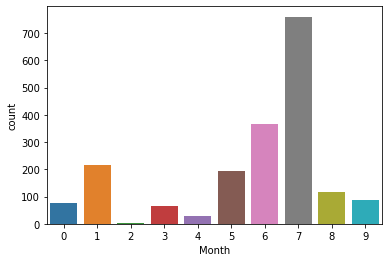

In [342]:
Yes=desc_data[desc_data['Purchase_Decision']==True]
Yes.head()
sns.countplot(x=Yes['Month'])

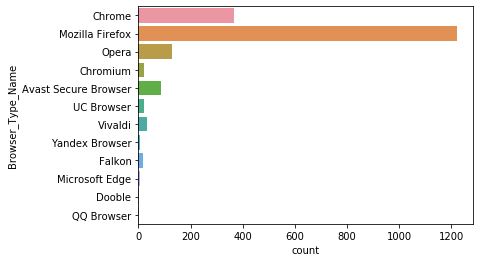

In [343]:
sns.countplot(y=Yes['Browser_Type_Name'])
# most of the transactions happend by customer who used Mozilla firefox.

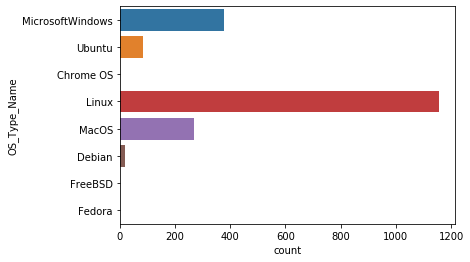

In [344]:
sns.countplot(y=Yes['OS_Type_Name'])
# most of the transactions happend by customer who used Linux.

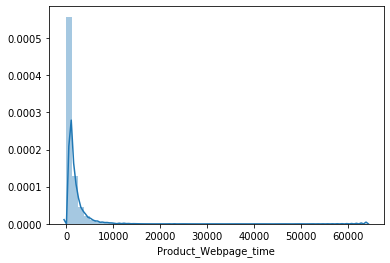

In [345]:
sns.distplot(desc_data['Product_Webpage_time'])
#Huge number of outliers to the right side of distribution and data is skewed

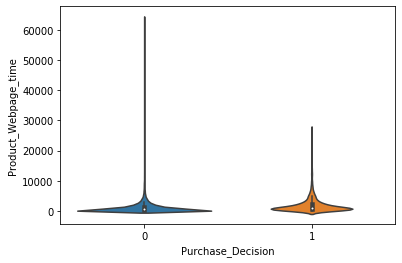

In [346]:
sns.violinplot(x='Purchase_Decision',y='Product_Webpage_time',data=desc_data)
#People who actually makes the purchase tend to spend more time on the webpage

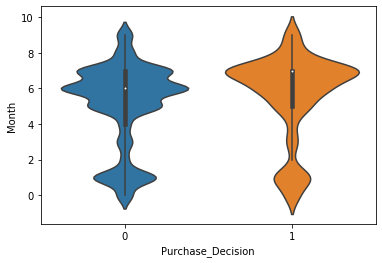

In [347]:
sns.violinplot(x='Purchase_Decision',y='Month',data=desc_data)
#There is no significant relation between the month and the purchase decision


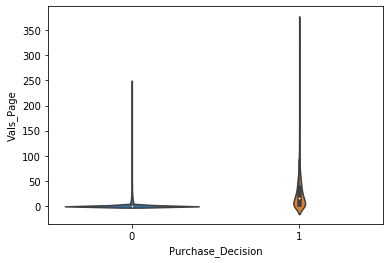

In [348]:
sns.violinplot(x='Purchase_Decision',y='Vals_Page',data=desc_data)

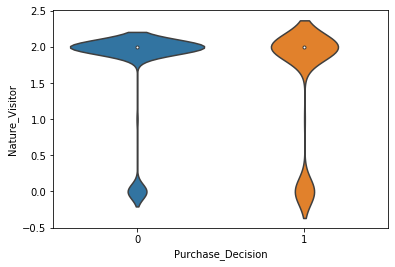

In [349]:
sns.violinplot(x='Purchase_Decision',y='Nature_Visitor',data=data)

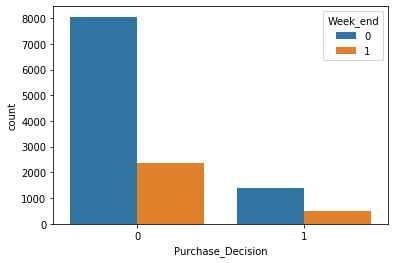

In [350]:
sns.countplot('Purchase_Decision',hue='Week_end',data=desc_data)
#Most of the purchases (encod - 1) are made during weekdays

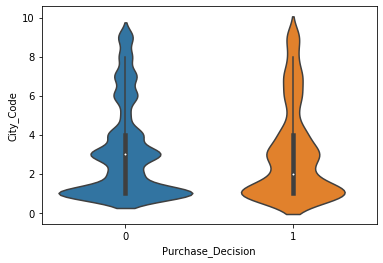

In [351]:
sns.violinplot(x='Purchase_Decision',y='City_Code',data=data)
#Most of the purchases are made in city code 1,2 and 3 which are Mumbai, Bangalore and New Delhi

##### Model Buidling

In [352]:
data_1=data.drop('Visitor ID',axis=1)

In [353]:
X=data_1.drop('Purchase_Decision',axis=1)
y=data_1.Purchase_Decision

In [354]:
data_1.shape

(12330, 18)

In [355]:
rf=RandomForestClassifier()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
rf.fit(x_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.8983509056501757

##### Results

In [358]:
## Build other RF models with different n_estimators
ls=[100,150,200]
for i in ls:
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    y_pred=rf.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('Accuracy score with n_estimators',i,'is',acc)
    
#Accuracy is higher with n_estimators 150 i.e. 90.18%

Accuracy score with n_estimators 100 is 0.901595025682617
Accuracy score with n_estimators 150 is 0.9005136523384698
Accuracy score with n_estimators 200 is 0.8972695323060287


In [359]:
#Area under the curve speaks about the model performance ,closer to 1 , good the model
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,classification_report, roc_auc_score

 

print("RESULTS ON VALIDATION SET\n====================")

print("F1 Score: ",f1_score(y_test, y_pred), "\n====================")
print("Classification Report\n ", classification_report(y_test, y_pred), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_test, y_pred), "\n====================")
print("AUC ROC Score\n ", roc_auc_score(y_test, y_pred), "\n====================")


RESULTS ON VALIDATION SET
F1 Score:  0.6441947565543071 
Classification Report
                precision    recall  f1-score   support

           0       0.92      0.96      0.94      3101
           1       0.73      0.58      0.64       598

    accuracy                           0.90      3699
   macro avg       0.83      0.77      0.79      3699
weighted avg       0.89      0.90      0.89      3699
 
Confusion Matrix
  [[2975  126]
 [ 254  344]] 
AUC ROC Score
  0.7673093909721647 
